In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
np.random.seed(0)
X = 2 * np.random.rand(100, 1) 
y = 4 + 3 * X + np.random.randn(100, 1)


In [5]:
def split_train_test(X, y, test_size=0.2):
    num_samples = X.shape[0]
    indices = np.arange(num_samples)
    np.random.shuffle(indices)
    test_set_size = int(num_samples * test_size)
    test_indices = indices[:test_set_size]
    train_indices = indices[test_set_size:]
    return X[train_indices], X[test_indices], y[train_indices], y[test_indices]

In [6]:
X_train, X_test, y_train, y_test = split_train_test(X, y)

In [8]:
def linear_regression(X, y):
    X_b = np.c_[np.ones((X.shape[0], 1)), X] 
    theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
    return theta_best

In [9]:
theta_best = linear_regression(X_train, y_train)


In [20]:
def predict(X, theta):
    X_b = np.c_[np.ones((X.shape[0], 1)), X] 
    return X_b.dot(theta)

In [21]:
y_train_pred = predict(X_train, theta_best)
training_error = np.mean((y_train - y_train_pred) ** 2)

In [22]:
def cross_validate(X, y, k=5):
    fold_size = X.shape[0] // k
    errors = []
    
    for i in range(k):
        X_train_fold = np.concatenate((X[:i*fold_size], X[(i+1)*fold_size:]), axis=0)
        y_train_fold = np.concatenate((y[:i*fold_size], y[(i+1)*fold_size:]), axis=0)
        X_val_fold = X[i*fold_size:(i+1)*fold_size]
        y_val_fold = y[i*fold_size:(i+1)*fold_size]
        
        theta_fold = linear_regression(X_train_fold, y_train_fold)
        y_val_pred = predict(X_val_fold, theta_fold)
        fold_error = np.mean((y_val_fold - y_val_pred) ** 2)
        errors.append(fold_error)
    
    return np.mean(errors)


In [23]:
cv_error = cross_validate(X, y, k=5)

In [24]:
print(f"Training Error (Mean Squared Error): {training_error:.2f}")
print(f"Cross-Validation Error (Mean Squared Error): {cv_error:.2f}")


Training Error (Mean Squared Error): 1.04
Cross-Validation Error (Mean Squared Error): 1.04


In [25]:
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

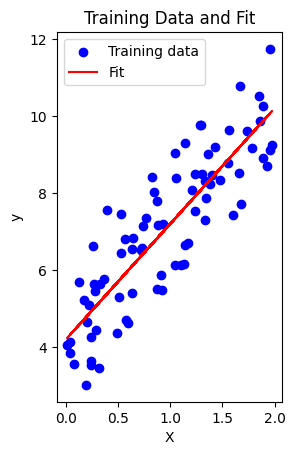

In [26]:
plt.subplot(1, 2, 1)
plt.scatter(X_train, y_train, color='blue', label='Training data')
plt.plot(X_train, predict(X_train, theta_best), color='red', label='Fit')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Training Data and Fit')
plt.legend()


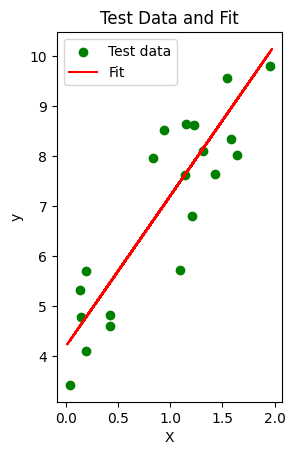

In [27]:
plt.subplot(1, 2, 2)
plt.scatter(X_test, y_test, color='green', label='Test data')
plt.plot(X_train, predict(X_train, theta_best), color='red', label='Fit')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Test Data and Fit')
plt.legend()


In [18]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>